In [1]:
import mcstasclasspy.mcmonloader as mcm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Example of loading an MD Histo File


In [2]:
dat= mcm.load_MD_Histo('../tests/data/test_MDhisto.nxs.h5')


['E', 'k']


In [3]:
dat

Note dat is a 2D instance.
Now to plot it

<IPython.core.display.Javascript object>


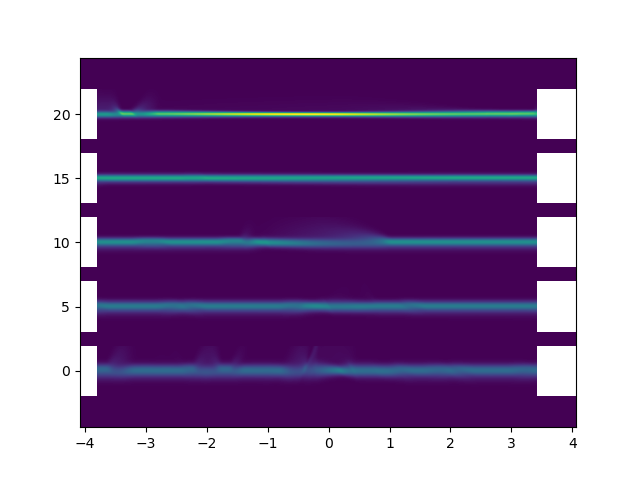

In [4]:
f,ax=plt.subplots()
dat.pcolor(ax=ax)

Taking a cut

In [5]:
cut_1 = dat.cut('y',2.0,0.5,xlims=(3.5,6.5))

<IPython.core.display.Javascript object>


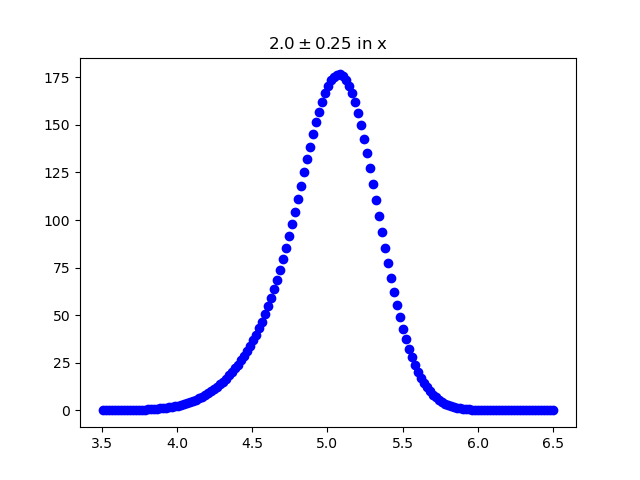

<ErrorbarContainer object of 3 artists>

In [6]:
f1,ax1=plt.subplots()
cut_1.errorbar(ax=ax1,fmt='bo')

## Fitting

Fitting relies on [lmfit](https://lmfit.github.io/lmfit-py/). It is a minimal increase in methods on the Data1D object. There are 3 attributes in the class related to fitting and 3 methods.  

### Attributes
1. fmodel is an lmfit model object.  This is typically populated with the setup_fit method. but can be setup by hand.

1. fparams is an lmfit parameters object. This is typically populated with the setup_fit method. but can be setup by hand.

1. fresult is a lmfit fit result object. It is populated by the fit method()

### Methods

1. setup_fit takes a model function as an input and populates the fmodel object as well as generates the fparams object.  The initial values of the fparams object can either be passed to setup_fit or they can be provided later. This example shows them being provided later.

1. fit performs the fit. It has two input parameter booleans useerr and nonzeroerr. If useerr is True (Default) it uses the errors for weighting.  If nonzeroerr=True (Default) it only uses the points with nonzero errors in the fit.

1. plot_fit. Is a convenince function that plots the result of a fit


define gaussian fit function

In [7]:
def gaussian(x, I0, FWHM, x0, y0):
    ln2 = 2*np.log(2)
    return y0+I0*np.sqrt(ln2/np.pi)/FWHM*np.exp(-ln2*((x-x0)/FWHM)**2)

setup fit

In [8]:
cut_1.setup_fit(gaussian)

In [9]:
cut_1.fparams


name,value,initial value,min,max,vary
I0,-inf,None,-inf,inf,True
FWHM,-inf,None,-inf,inf,True
x0,-inf,None,-inf,inf,True
y0,-inf,None,-inf,inf,True


Note the parameters are populated, but there are no values.  Set the values below in the standard lmfit way.

In [10]:
cut_1.fparams['I0'].value = 175
cut_1.fparams['FWHM'].value = 1
cut_1.fparams['x0'].value = 5
cut_1.fparams['y0'].value = 0 

In [11]:
cut_1.fparams

name,value,initial value,min,max,vary
I0,175.000000,None,-inf,inf,True
FWHM,1.00000000,None,-inf,inf,True
x0,5.00000000,None,-inf,inf,True
y0,0.00000000,None,-inf,inf,True


Now you see they are set.  Let's do the fit. All the errors in this data set are zero so we won't use them in the fit.

In [12]:
cut_1.fit(useerr=False)

On the fitresult object you can use any of the standard lmfit methods like printing the report

In [13]:
print(cut_1.fresult.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 151
    # variables        = 4
    chi-square         = 3176.02577
    reduced chi-square = 21.6056175
    Akaike info crit   = 467.962021
    Bayesian info crit = 480.031140
[[Variables]]
    I0:    120.755400 +/- 1.12708632 (0.93%) (init = 175)
    FWHM:  0.46649969 +/- 0.00411818 (0.88%) (init = 1)
    x0:    5.05076981 +/- 0.00214865 (0.04%) (init = 5)
    y0:    1.67362568 +/- 0.53156397 (31.76%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(I0, FWHM) = 0.705
    C(I0, y0)   = -0.703
    C(FWHM, y0) = -0.495


Looking at the parameters of the fit object gives more detail than before

In [14]:
cut_1.fresult.params

name,value,standard error,relative error,initial value,min,max,vary
I0,120.755400,1.12708632,(0.93%),175,-inf,inf,True
FWHM,0.46649969,0.00411818,(0.88%),1,-inf,inf,True
x0,5.05076981,0.00214865,(0.04%),5,-inf,inf,True
y0,1.67362568,0.53156397,(31.76%),0,-inf,inf,True


An example of the convenience function

<IPython.core.display.Javascript object>


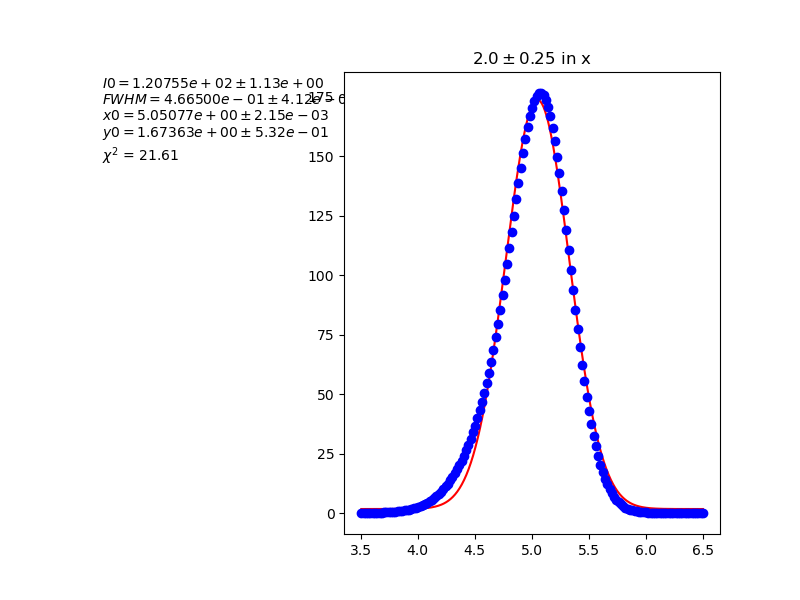

(<Figure size 800x600 with 2 Axes>,
 array([<AxesSubplot:>,
        <AxesSubplot:title={'center':'$2.0\\pm0.25$ in x'}>], dtype=object))

In [15]:
cut_1.plot_fit()